# TSF - GRIP - Data Science and Business Analytics Internship
<b>#Intern : Harshil Deepak Patel
#Task2 - Prediction using unsupervised ML
#Problem Statement - From the given 'Iris' dataset, predict the number of clusters and represent it visually<b>

Step1 : Importing the libraries
Step2 : Understanding the dataset
Step3 : Using K-means clustering for Q:Predict optimum number of clusters
Step4 : Applying clustering to dataset for Q:Virtual representation of clusters
Step6 : Conclusion
Dataset : https://bit.ly/3kXTdox (Iris.csv file having 6 attributes, 150 entries)

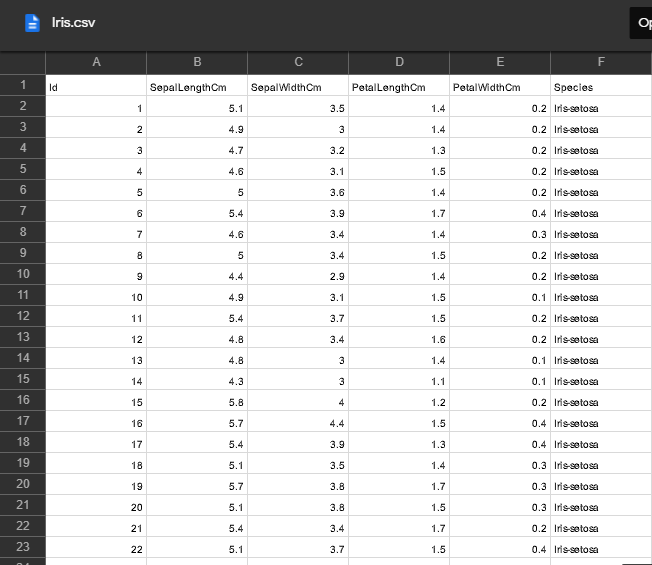

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans  

In [2]:
dataset = datasets.load_iris()

In [3]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df_target = pd.DataFrame(dataset.target, columns = ['Target'])

In [4]:
df.shape

(150, 4)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
print(dataset.target_names) #output shows species of flowers in iris dataset

['setosa' 'versicolor' 'virginica']


In [8]:
df_target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [9]:
x = df.iloc[:, [0,1,2,3]].values
y = df_target.iloc[:, 0].values
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
x = df.iloc[:, [0,1,2,3]].values
cluster=[] #within clustered sum of squares
for i in range(1,11):
    KM = KMeans(n_clusters = i, max_iter = 300)
    KM.fit(x)
    cluster.append(KM.inertia_) #calculating squared error for clustered pts.

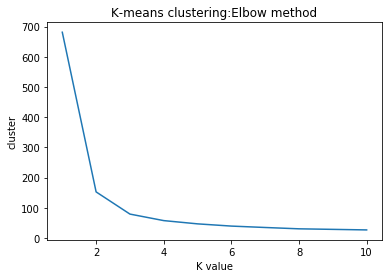

In [13]:
plt.plot(range(1,11),cluster)
plt.title('K-means clustering:Elbow method')
plt.xlabel("K value")
plt.ylabel("cluster")
plt.show()

<b>Q: Predict the optimum number of clusters<b>
    
<b>A: From the above graph, we observe that there is no signifiant decrease in the K value after K=3. 
      Thus, the optimum number of clusters will be = 3<b>

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x) 

<b>Q: Visual Representation of of the cluster<b>

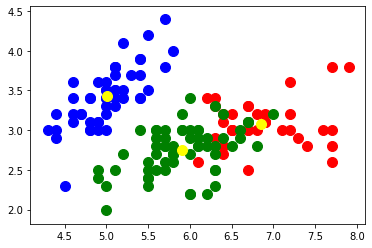

In [17]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green')
#Color red represents 'Iris-setosa', blue represents 'Iris-versicolou' and green represents 'Iris-virginica'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow")
#Color yellow shows us the centroids

<b>Conclusion<b>

<b>The task was to predict the optimum numbers of clusters to be used for the Iris dataset which had 6 attributes and 150 entries. K-means clustering was used for this as it gives us a classification on the dataset. This is an important aspect of data preporcessing while mining data. 

We use elbow method and from the graph, it is evident that optimum value of K=3. We represent it virtually and create three clusters for 3 species of iris dataset. We use different colors to represent the clusters along with cluster centroids.<b>